In [1]:
import  tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import insurance data from Keras

In [2]:
insurance_data = pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv')
insurance_data.shape

(1338, 7)

In [5]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5bfb7dadb8e2e2bb94c964f9b3d261d2fcbf51b074c8bb3d0bd40161d101237d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(insurance_data, title="Insurance Profiling Report")
profile.to_file("insurance_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Data preprocessing

##  One hot encoding of smoker, region

In [ ]:
insurance_data = pd.get_dummies(insurance_data)

In [ ]:
insurance_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


## create features and labels

In [ ]:
X = insurance_data.drop('charges', axis = 1)
y = insurance_data['charges']

X.shape, y.shape

((1338, 11), (1338,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

X_train.shape, X_test.shape

((936, 11), (402, 11))

# Build model

In [ ]:
tf.random.set_seed(2023)

# create model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11], name='Input_layer'),
    tf.keras.layers.Dense(100, name='hidden_layer1'),
    tf.keras.layers.Dense(100)
], name="first_model")


# compile model
insurance_model_1.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit model

history = insurance_model_1.fit(X_train, y_train, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 3ms/step - loss: 13118.0146 - mae: 13118.0146
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 12881.2852 - mae: 12881.2852
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 11896.4736 - mae: 11896.4736
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 9588.9180 - mae: 9588.9180
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 7532.0195 - mae: 7532.0195
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 7309.3838 - mae: 7309.3838
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 7254.8384 - mae: 7254.8384
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 7218.3345 - mae: 7218.3345
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 7179.7139 - mae: 7179.7139
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 7140.1152 - mae: 714

In [ ]:
insurance_model_1.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3456.3328 - mae: 3456.3328


[3456.332763671875, 3456.332763671875]

Text(0.5, 0, 'epochs')

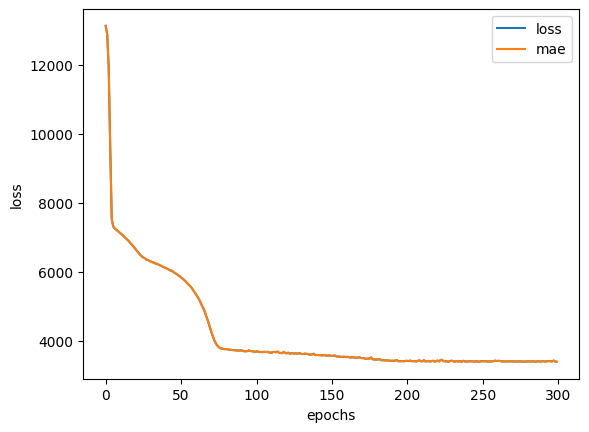

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience = 10)

history = insurance_model_1.fit(X_test, y_test, epochs= 300, callbacks=[callback])

Epoch 1/300
13/13 [==============================] - 0s 2ms/step - loss: 3449.7720 - mae: 3449.7720
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 3443.1536 - mae: 3443.1536
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 3480.2681 - mae: 3480.2681
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 3480.3997 - mae: 3480.3997
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 3476.1594 - mae: 3476.1594
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 3446.6929 - mae: 3446.6929
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 3448.4897 - mae: 3448.4897
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 3453.1746 - mae: 3453.1746
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 3447.6782 - mae: 3447.6782
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 3469.5967 - mae: 3469.5967

Text(0.5, 0, 'epochs')

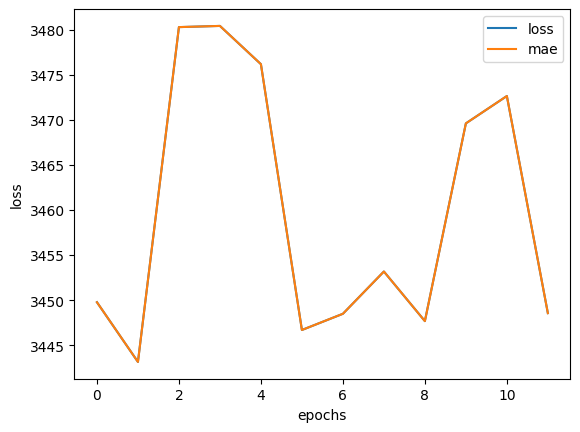

In [ ]:
pd.DataFrame(history.history).plot()

plt.ylabel('loss')
plt.xlabel('epochs')


# Using scalling and oneHotEncoding as column Transformer

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

In [ ]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown= 'ignore'), ['sex', 'region', 'smoker'])
)

In [ ]:
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

In [ ]:
from tensorflow.python.ops.random_ops import random_seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

X_train.shape

(936, 11)

In [ ]:
#model

callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11], name="input_layer"),
    tf.keras.layers.Dense(100, name="hidden_layer1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="second_model")


insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = insurance_model_2.fit(X_train, y_train, epochs=200, callbacks=[callback])

Epoch 1/200
30/30 [==============================] - 1s 2ms/step - loss: 13003.3672 - mae: 13003.3672
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 12416.5713 - mae: 12416.5713
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 10870.1748 - mae: 10870.1748
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 8453.7256 - mae: 8453.7256
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 7316.9126 - mae: 7316.9126
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 7286.7510 - mae: 7286.7510
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 7236.4399 - mae: 7236.4399
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 7197.7036 - mae: 7197.7036
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 7154.5469 - mae: 7154.5469
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 7111.1646 - mae: 711

In [ ]:
insurance_model_2.summary()

Model: "second_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 hidden_layer1 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_model_2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3465.9070 - mae: 3465.9070


[3465.906982421875, 3465.906982421875]

Text(0.5, 0, 'epochs')

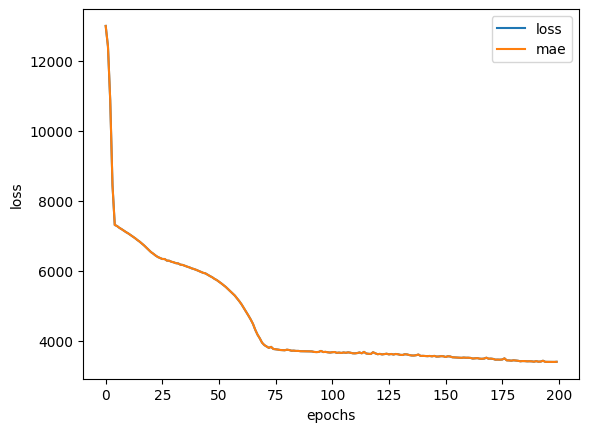

In [ ]:
pd.DataFrame(history.history).plot()

plt.ylabel("loss")

plt.xlabel('epochs')

In [ ]:
insurance_model_2.save('insurance_model.h5')

In [ ]:
from google.colab import files

files.download('/content/insurance_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>